In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression



# import data

In [83]:
df = pd.read_excel('premiums_young_with_gr.xlsx')
df.head()


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [84]:
df.shape

(20096, 14)

In [85]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    20096 non-null  int64 
 1   gender                 20096 non-null  object
 2   region                 20096 non-null  object
 3   marital_status         20096 non-null  object
 4   number_of_dependants   20096 non-null  int64 
 5   bmi_category           20096 non-null  object
 6   smoking_status         20094 non-null  object
 7   employment_status      20095 non-null  object
 8   income_level           20092 non-null  object
 9   income_lakhs           20096 non-null  int64 
 10  medical_history        20096 non-null  object
 11  insurance_plan         20096 non-null  object
 12  annual_premium_amount  20096 non-null  int64 
 13  genetical_risk         20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


## Handle Na & duplicate values

In [87]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [88]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [89]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [90]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [91]:
df[df.number_of_dependants<0].shape

(22, 14)

In [92]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [93]:
df.number_of_dependants = abs(df.number_of_dependants)

Finding Outliers 

In [94]:
numeric_col = df.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

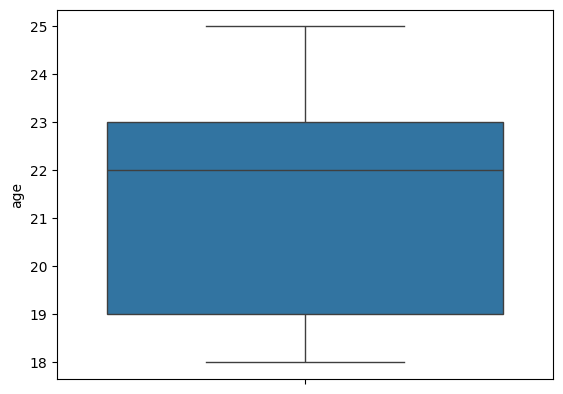

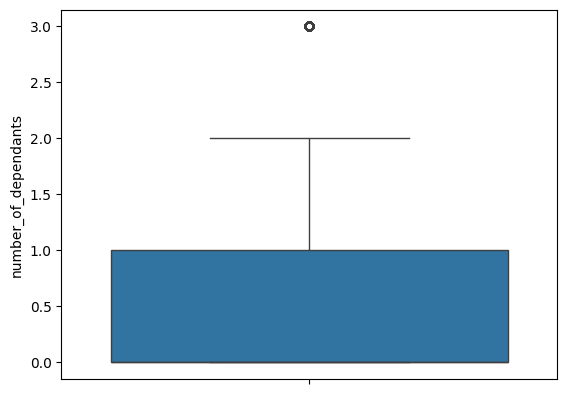

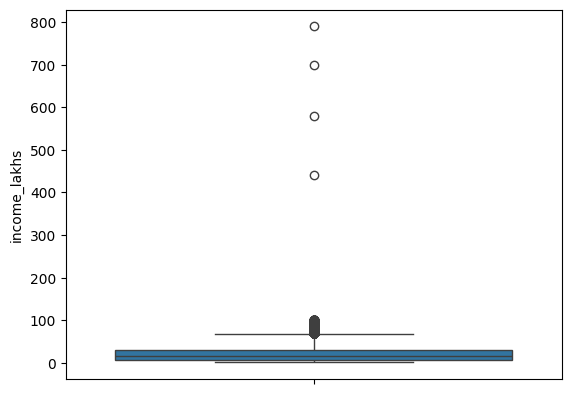

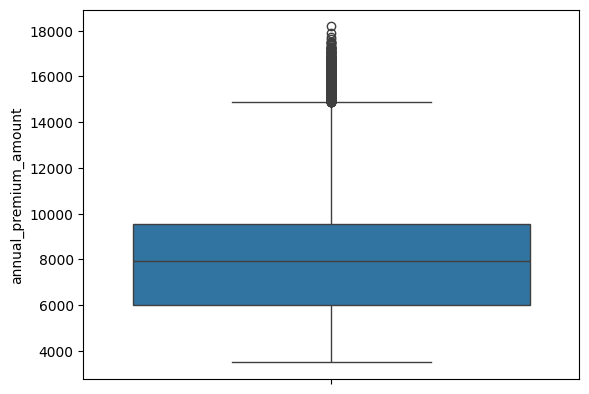

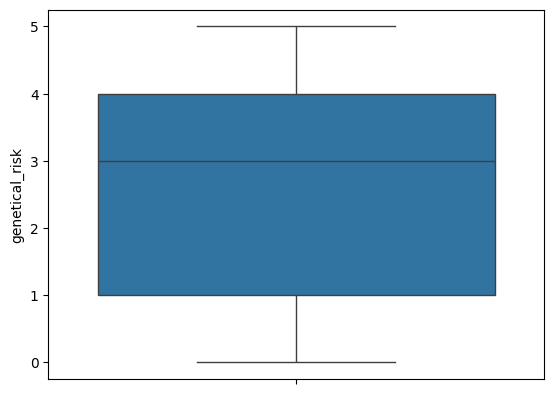

In [95]:
# fig, axes = plt.subplots(2, 2, figsize=(18, 8))  # Creates a 2x2 grid of subplots

for col in numeric_col :
    sns.boxplot(df[col])
    plt.show()



Ouliers in Age Colume

In [96]:
df[df.age>100].age.unique()

array([], dtype=int64)

In [97]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


Ouliers in Income_lakhs column

In [98]:
def get_iqr_bound(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    higher = q3 + 1.5*iqr

    return lower, higher

In [99]:
get_iqr_bound(df.income_lakhs)

(-31.5, 68.5)

In [100]:
quantile_thresold = df.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(100.0)

In [101]:
df1[df1['income_lakhs']>quantile_thresold].shape

(4, 14)

In [102]:
df2 = df1[df1['income_lakhs']<=quantile_thresold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


## Visulaization distubution


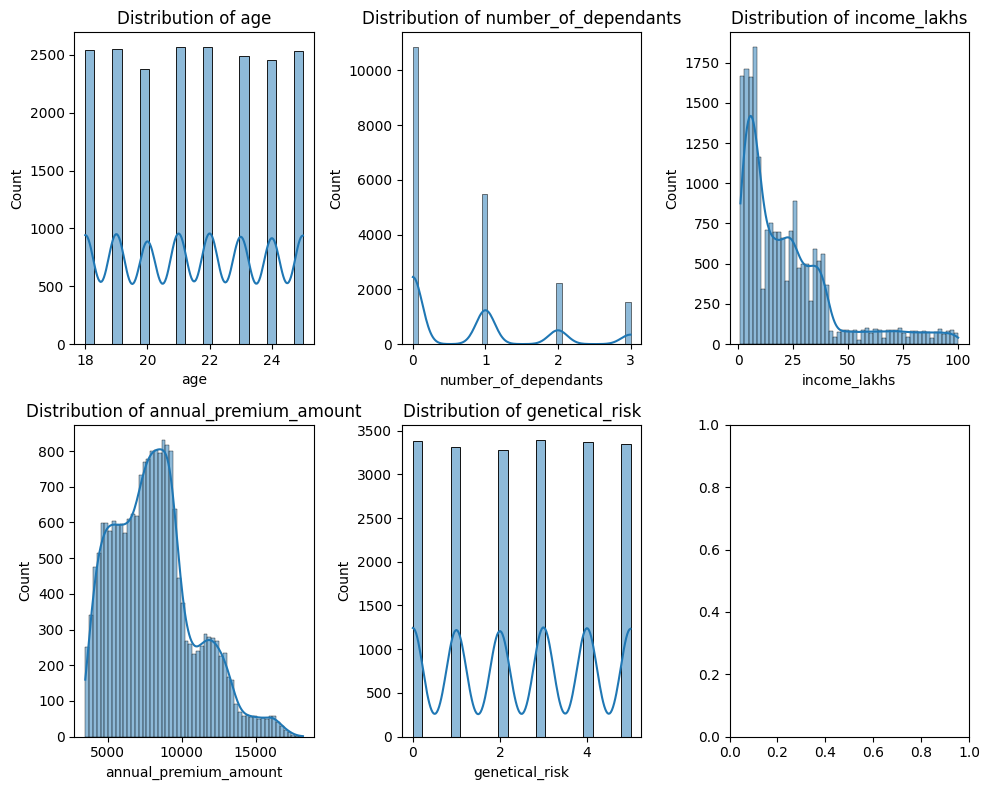

In [103]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # Dynamic size based on column count

for i, col in enumerate(numeric_col):
    ax = axs[i//3, i%3]
    sns.histplot(df2[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')  # Adding title for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


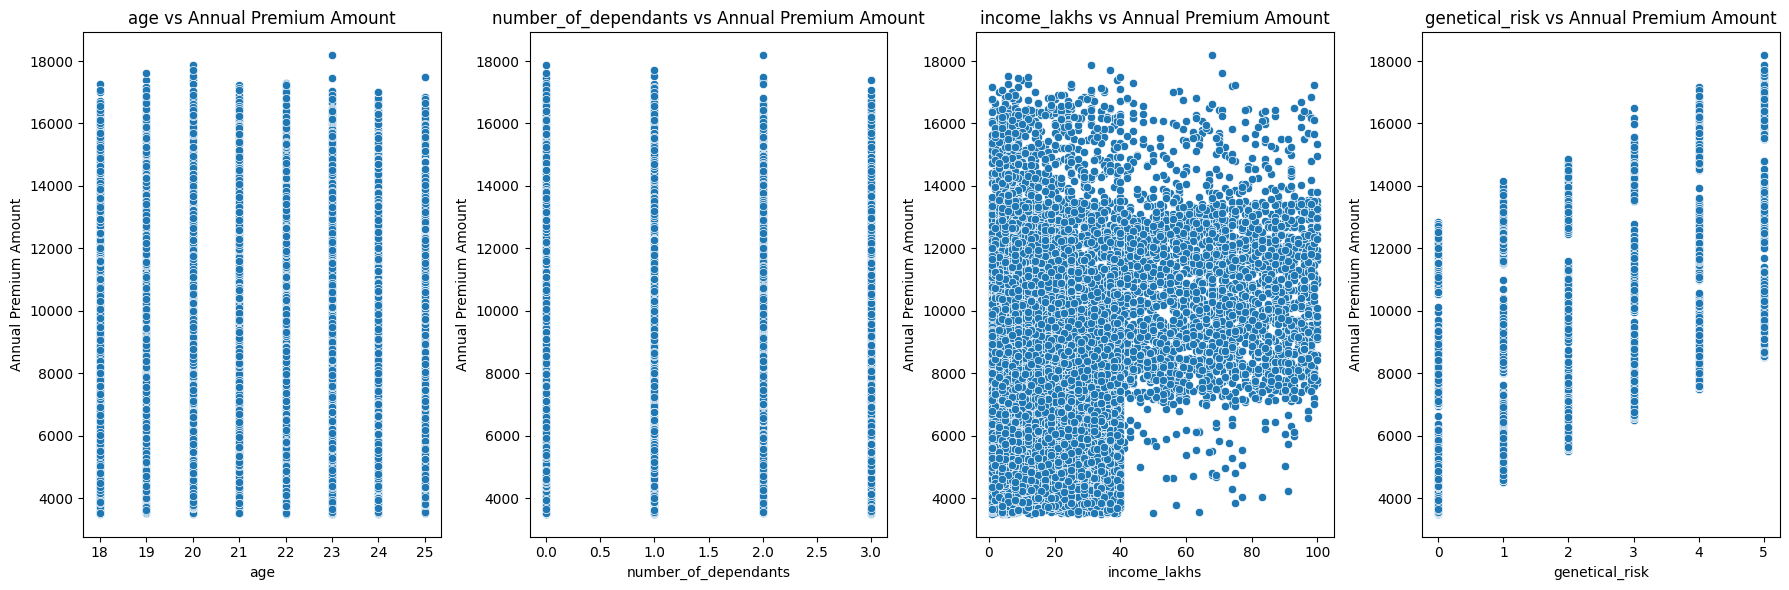

In [105]:
num_feat = ['age', 'number_of_dependants', 'income_lakhs', 'genetical_risk']

fig, axes = plt.subplots(1, len(num_feat), figsize=(18, 6))  # Dynamic size based on column count

for ax, col in zip(axes, num_feat):
    sns.scatterplot(x=df2[col], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{col} vs Annual Premium Amount')
    ax.set_xlabel(col)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout to prevent overlap 
plt.show()


In [64]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [44]:
cat_feat = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'medical_history', 'insurance_plan', 'income_level']

for col in cat_feat:
    print(col, ':', df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']


In [45]:
df2.smoking_status.replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking': 'No Smoking'
}, inplace=True)
df2.smoking_status.unique()

C:\Users\chara\AppData\Local\Temp\ipykernel_18696\2529991949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.smoking_status.replace({


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

<Axes: ylabel='proportion'>

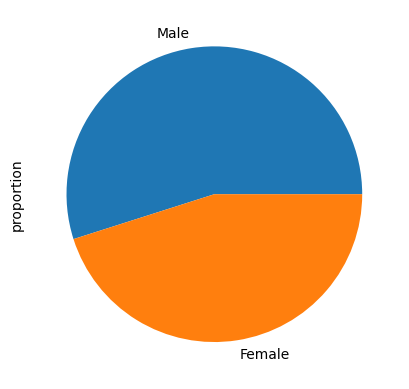

In [67]:
df2.gender.value_counts(normalize=True).plot(kind='pie')

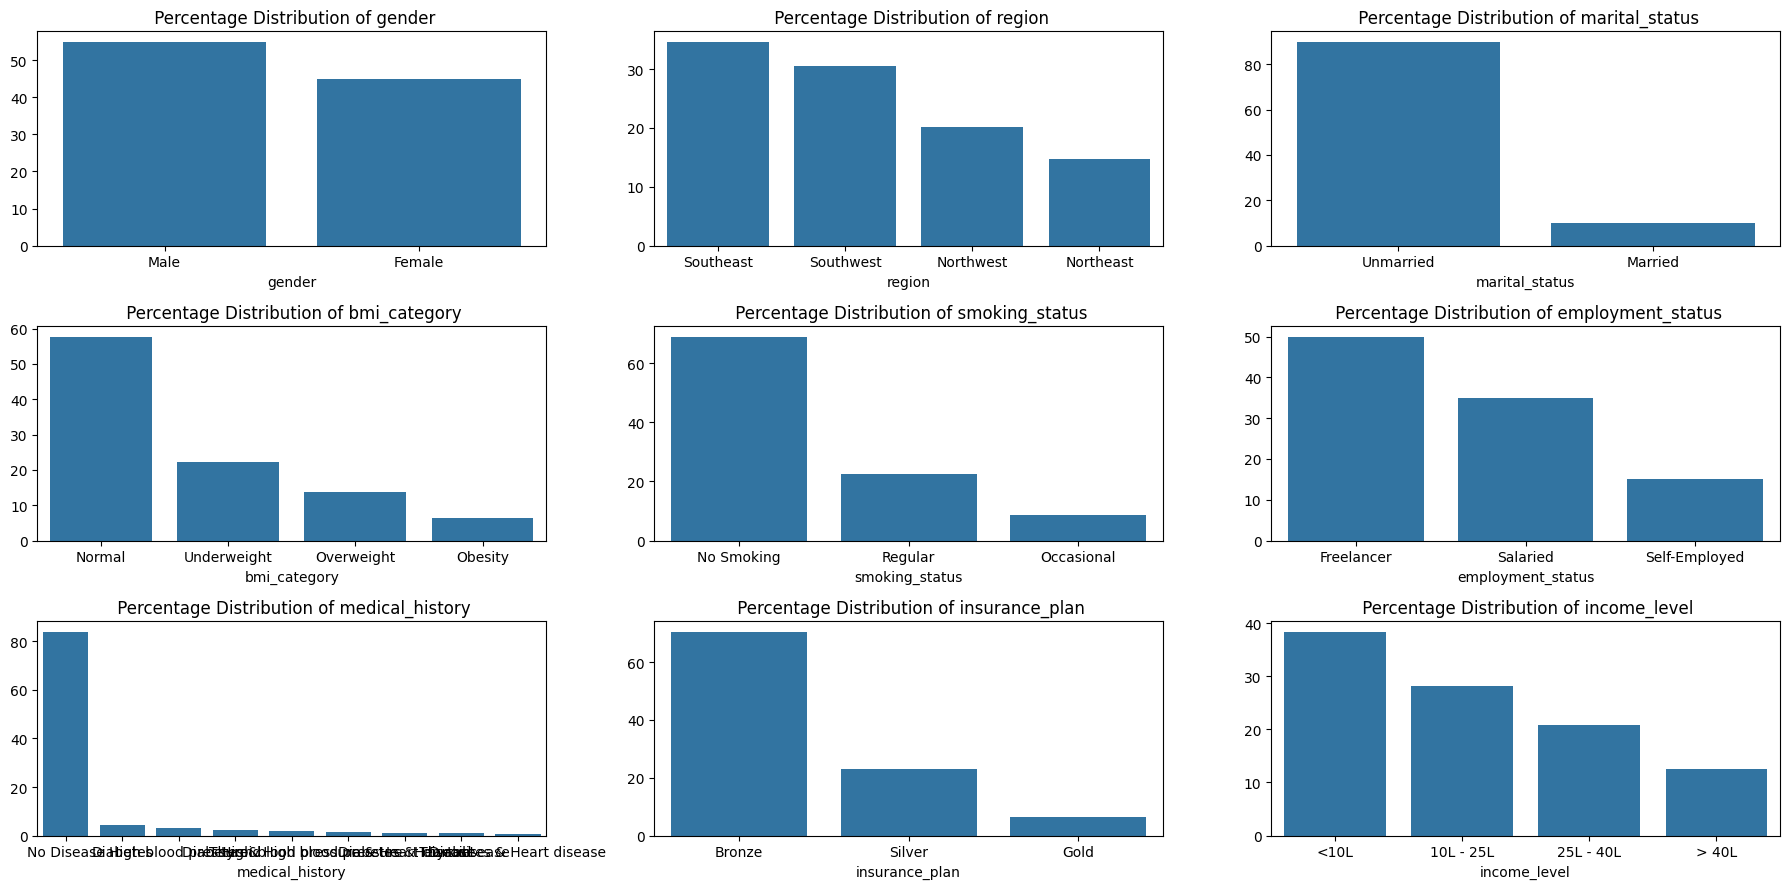

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(18, 9))  # Dynamic size based on column count 
# ax = axes.flatten() 

for ax, col in zip(axes.flatten(), cat_feat): 
    
    pert = df2[col].value_counts(normalize=True)*100 
    sns.barplot(x=pert.index, y=pert.values, ax=ax) 
    ax.set_title(f' Percentage Distribution of {col}')  # Adding title for clarity 
    ax.set_xlabel(col)  

plt.tight_layout()  # Adjust layout to prevent overlap 
plt.show() 

In [69]:
cross_tab = pd.crosstab(df2.income_level, df2.insurance_plan)
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


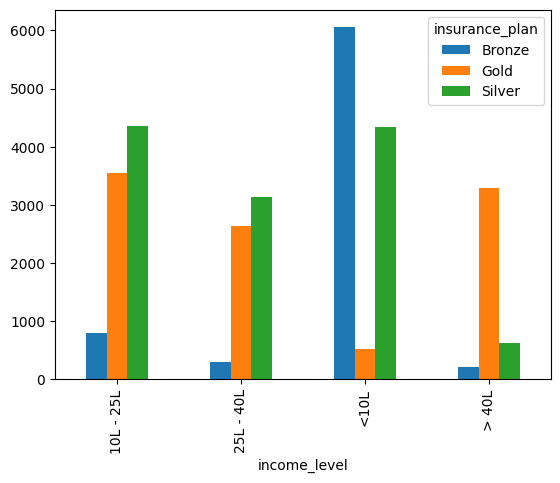

In [70]:
cross_tab.plot(kind='bar')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

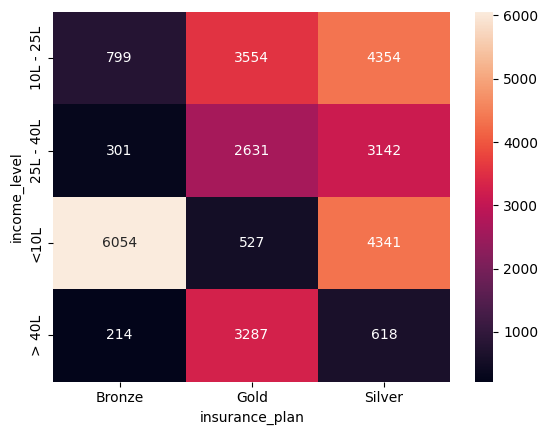

In [71]:
sns.heatmap(cross_tab, annot=True, fmt='d')

# Feature Engineering

In [47]:
# df2.fillna('None', inplace=True)
df.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [48]:
risk_score = {
    'diabetes' : 6,
    'heart disease': 8, 
    'high blood pressure': 6,
    'thyroid' : 5,
    'no disease': 0,
    'none': 0
}


In [49]:
df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
18028,24,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,20,No Disease,Gold,11324,0,no disease,None
11382,21,Female,Southwest,Unmarried,0,Normal,Regular,Salaried,10L - 25L,23,No Disease,Silver,11506,3,no disease,None
9624,20,Male,Northeast,Unmarried,0,Obesity,Regular,Self-Employed,25L - 40L,31,No Disease,Gold,17878,5,no disease,None
1158,23,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,25L - 40L,33,No Disease,Bronze,9205,5,no disease,None
12567,22,Male,Southeast,Unmarried,0,Normal,No Smoking,Salaried,10L - 25L,15,No Disease,Bronze,8019,4,no disease,None


In [51]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

In [52]:
print(df2['disease1'].unique())
print(df2['disease2'].unique())

['high blood pressure' 'no disease' 'diabetes' 'heart disease' 'thyroid']
['none' 'high blood pressure' 'heart disease' 'thyroid']


In [53]:
df2['total_risk_score'] = 0

df2['total_risk_score'] = df2.apply(lambda x: risk_score.get(x['disease1'], 0) + risk_score.get(x['disease2'], 0), axis=1)

max_sc = df2.total_risk_score.max()
min_sc = df2.total_risk_score.min()
df2['normalized_risk_score'] = (df2.total_risk_score-min_sc)/(max_sc - min_sc)

df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
5797,21,Male,Southwest,Unmarried,1,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,4517,1,no disease,none,0,0.000000
19251,25,Male,Southwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5370,1,no disease,none,0,0.000000
6688,22,Male,Southeast,Unmarried,1,Normal,Regular,Salaried,<10L,7,High blood pressure,Silver,8686,0,high blood pressure,none,6,0.428571
12986,24,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,24,No Disease,Gold,12948,2,no disease,none,0,0.000000
16454,22,Female,Northeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,12,High blood pressure,Silver,9032,1,high blood pressure,none,6,0.428571


In [54]:
df2.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
disease1                 0
disease2                 0
total_risk_score         0
normalized_risk_score    0
dtype: int64

In [55]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold': 3})
df2.insurance_plan.unique()

array([2, 1, 3])

In [56]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '> 40L': 3, '25L - 40L': 4})
df2['income_level'].unique()

array([3, 1, 2, 4])

In [81]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
5426,41,Male,Southwest,Married,4,Overweight,Regular,Freelancer,2,12,Diabetes & High blood pressure,2,22532,diabetes,high blood pressure,12,0.857143
32014,49,Female,Northwest,Married,2,Normal,Occasional,Salaried,4,30,High blood pressure,3,27507,high blood pressure,none,6,0.428571
5206,27,Female,Southeast,Married,3,Overweight,No Smoking,Freelancer,1,3,Diabetes & High blood pressure,1,12908,diabetes,high blood pressure,12,0.857143
11247,36,Male,Northwest,Married,2,Overweight,Regular,Salaried,2,12,Diabetes,2,20408,diabetes,none,6,0.428571
5771,40,Female,Southeast,Married,3,Overweight,No Smoking,Freelancer,1,2,No Disease,1,8772,no disease,none,0,0.000000


In [57]:
nomial_col = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status' ]

df3 = pd.get_dummies(df2, columns=nomial_col, drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [58]:
df4 = df3.drop(columns=['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


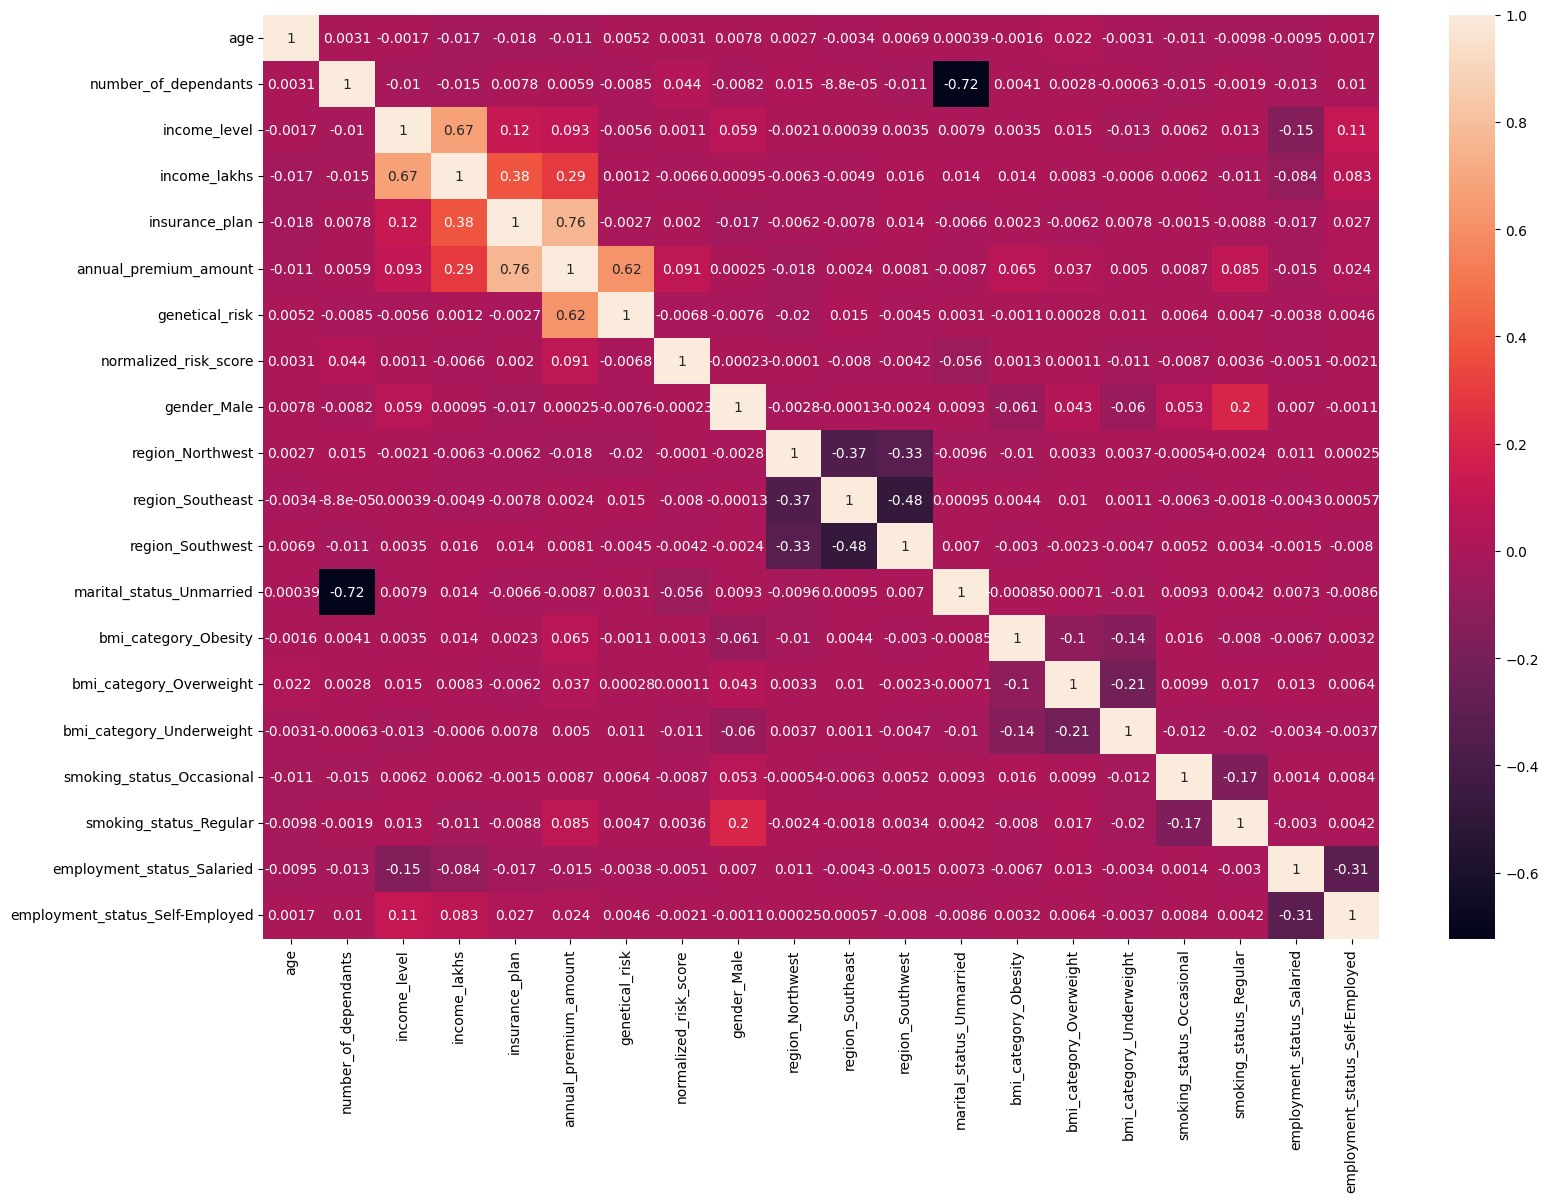

In [59]:
cm = df4.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(cm, annot=True)
plt.show()

MinMaxScaling Cols

In [60]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

X.head()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,2,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [61]:
col_scale = ['age', 'number_of_dependants', 'income_lakhs', 'income_level', 'insurance_plan', 'genetical_risk']

scaler = MinMaxScaler()
X[col_scale] = scaler.fit_transform(X[col_scale])

X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.386123,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.383007,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['vif'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df


In [63]:
vif(X)

,column,vif
0,age,3.155837
1,number_of_dependants,1.936584
2,income_level,3.916214
3,income_lakhs,4.344741
4,insurance_plan,1.647600
5,genetical_risk,2.981440
6,normalized_risk_score,1.154735
7,gender_Male,2.318870
8,region_Northwest,2.155017
9,region_Southeast,2.991916


# Model Training

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((20875, 18), (8947, 18), (20875,), (8947,))

In [65]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)


0.9887237174117074

In [66]:
train_score = model_lr.score(X_train, y_train)
teat_score = model_lr.score(X_test, y_test)

train_score, teat_score

(0.9882981483967666, 0.9887237174117074)

In [67]:
feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['coeff'])
coef_df = coef_df.sort_values(by='coeff', ascending=True)

coef_df

,coeff
age,-7.207551
employment_status_Self-Employed,-5.036140
income_level,-4.997981
region_Southeast,-3.318984
employment_status_Salaried,-0.273865
region_Northwest,1.634484
income_lakhs,5.099411
region_Southwest,6.252102
gender_Male,8.388097
marital_status_Unmarried,16.029292


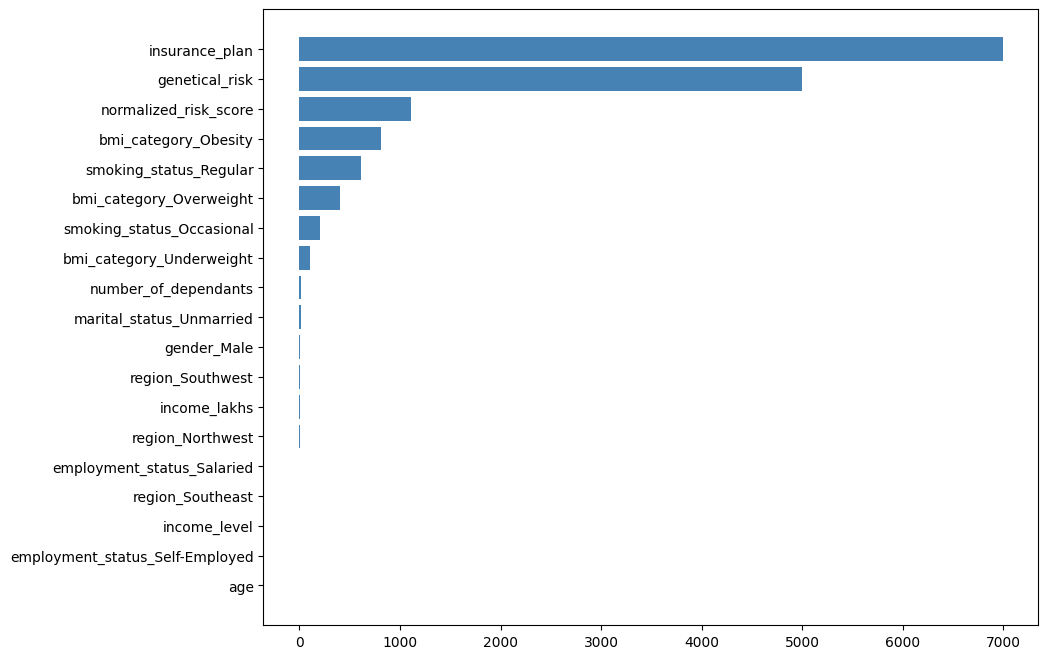

In [68]:
plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df.coeff, color='steelblue')
plt.show()

In [69]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)

train_score = model_xg.score(X_train, y_train)
teat_score = model_xg.score(X_test, y_test)

train_score, teat_score


(0.9925611615180969, 0.987707257270813)

RandamSearch Cross Validation

In [96]:
param_grid = {
    'n_estimator' : [20, 40, 50],
    'learning_rate': [0.01, 0.01, 0.2],
    'max_depth' : [3, 4, 5]
}

random_search = RandomizedSearchCV(model_xg, param_grid, n_iter=10,  cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
random_search.best_score_

c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimato

np.float64(0.9980824589729309)

In [97]:
random_search.best_params_

{'n_estimator': 20, 'max_depth': 5, 'learning_rate': 0.2}

In [98]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=20,
             n_estimators=None, n_jobs=None, ...)

In [107]:
best_model = model_lr

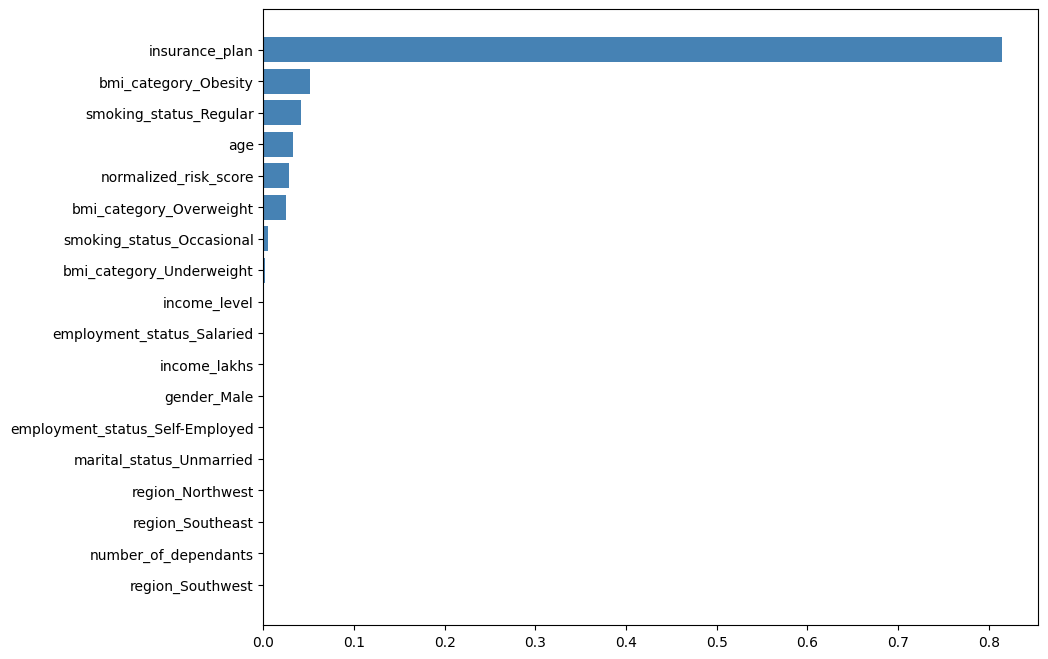

In [99]:
feature_importance = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['coeff'])
coef_df = coef_df.sort_values(by='coeff', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df.coeff, color='steelblue')
plt.show()

# Error analysis

In [70]:
y_pred = best_model.predict(X_test)

resd  = y_pred-y_test
resd_per = resd*100/y_test

results_df = pd.DataFrame({
    'acutal': y_test,
    'predicted': y_pred,
    'dif': resd,
    'diff_pct': resd_per

})

results_df.head()


,acutal,predicted,dif,diff_pct
12774,6238,6122.567804,-115.432196,-1.850468
14758,9462,9603.065103,141.065103,1.490859
13205,5152,5611.459346,459.459346,8.918077
14278,6988,7424.147352,436.147352,6.241376
19351,4917,5111.886733,194.886733,3.963529


<Axes: xlabel='diff_pct', ylabel='Count'>

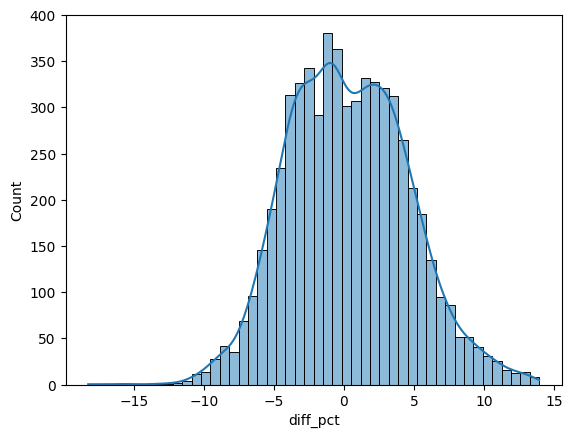

In [71]:
sns.histplot(results_df.diff_pct, kde=True)

In [72]:
error_threshold = 10

error_pred = results_df[abs(results_df.diff_pct)>error_threshold]
error_pred.shape

(129, 4)

In [73]:
error_pred.shape[0]*100/results_df.shape[0]

2.140723531364089

In [78]:
results_df[abs(results_df.diff_pct)>15].sort_values(by='diff_pct', ascending=False)


,acutal,predicted,dif,diff_pct
6235,5473,4637.666092,-835.333908,-15.262816
14450,5517,4628.728166,-888.271834,-16.100631
2255,5669,4634.605655,-1034.394345,-18.246505


In [79]:
error_df = X_test.loc[error_pred.index]
error_df

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.000000,0.333333,0.151515,0.0,0.2,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
17084,1.000000,0.000000,1.000000,0.353535,0.0,0.0,0.000000,1,0,0,0,1,0,0,0,0,0,0,0
7181,0.571429,0.000000,0.333333,0.161616,0.0,0.0,0.000000,1,0,0,1,1,0,0,0,0,0,0,0
12285,0.428571,0.333333,0.333333,0.232323,0.0,0.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0.000000,0.000000,0.333333,0.161616,0.0,0.2,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
8008,0.285714,0.000000,0.333333,0.242424,0.0,0.2,0.000000,1,1,0,0,1,0,1,0,0,0,0,0
9714,0.142857,0.000000,1.000000,0.313131,0.0,0.0,0.000000,1,0,0,0,1,0,0,0,0,0,1,0
7357,1.000000,0.666667,0.000000,0.000000,0.0,0.6,0.571429,1,1,0,0,1,0,0,0,0,0,0,0


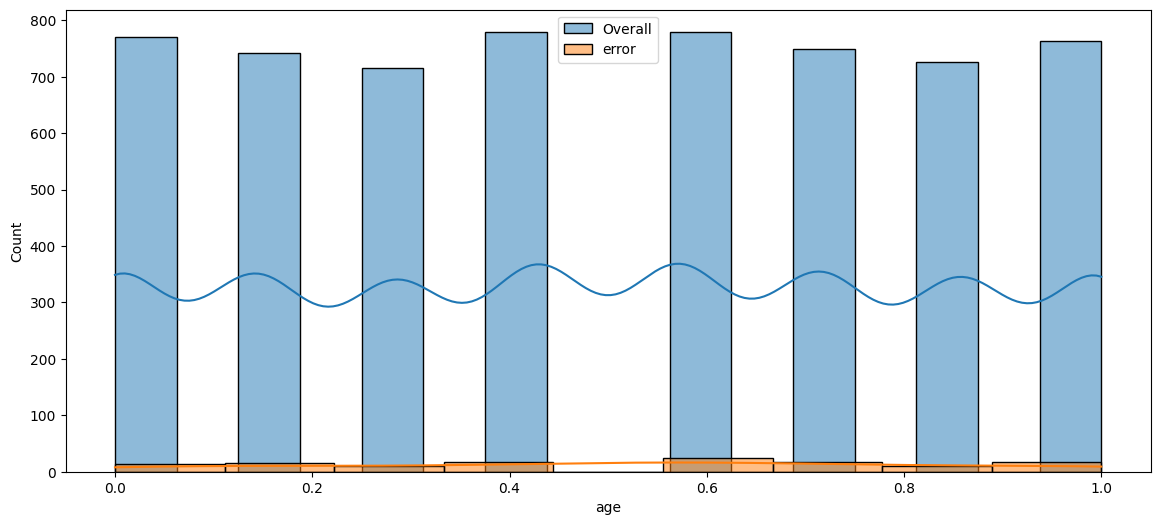

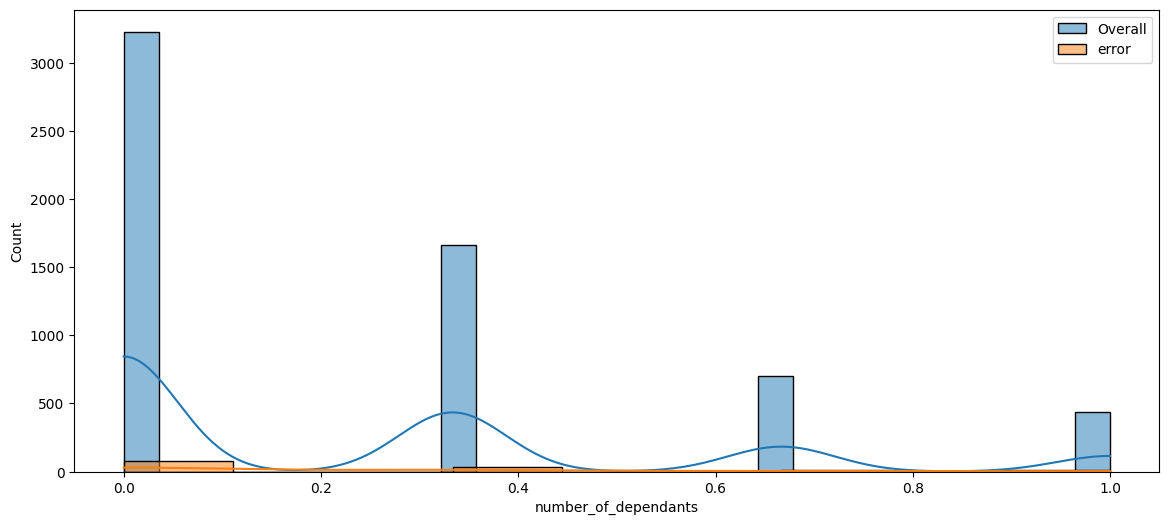

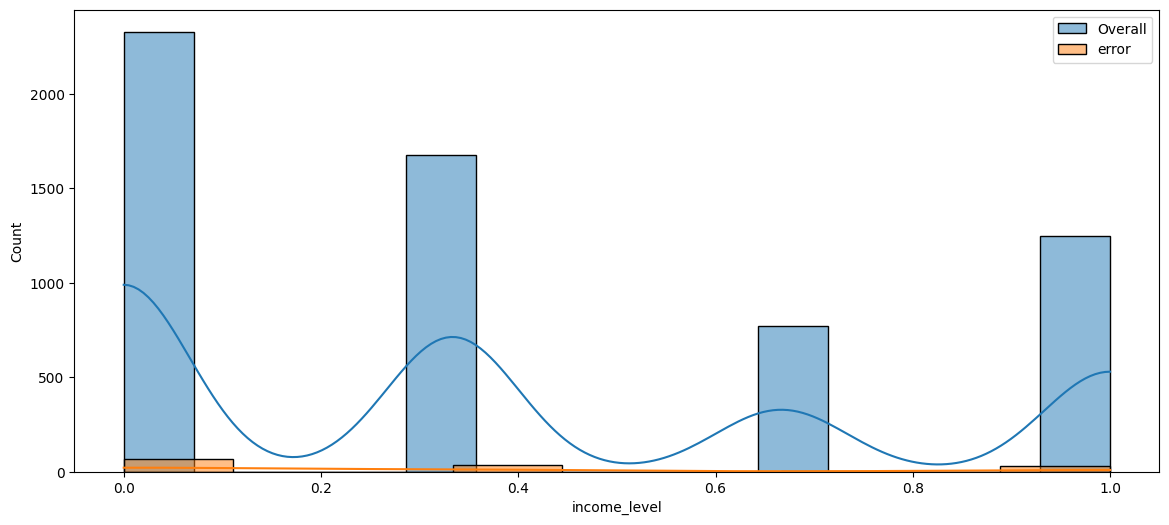

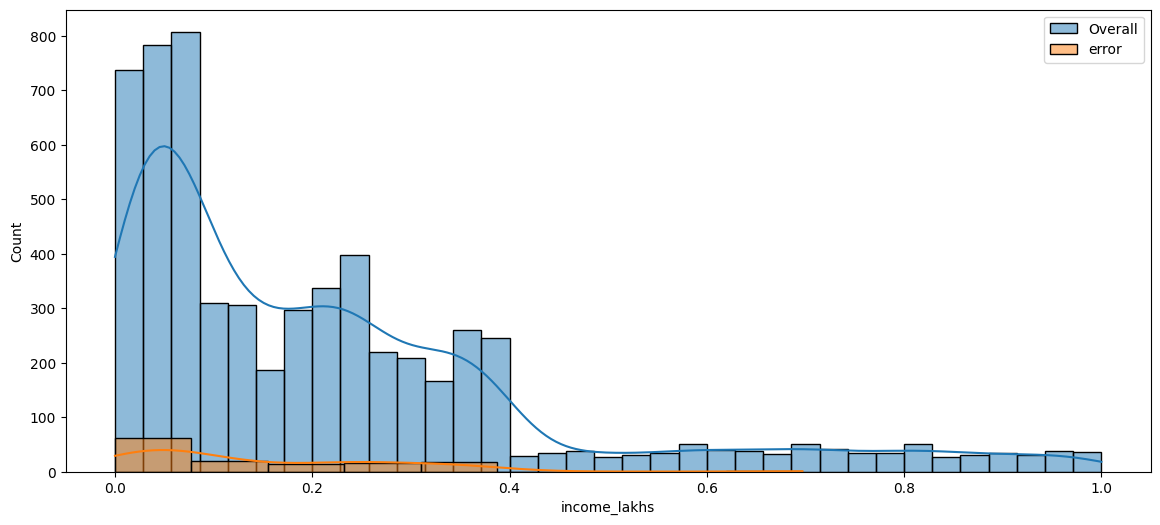

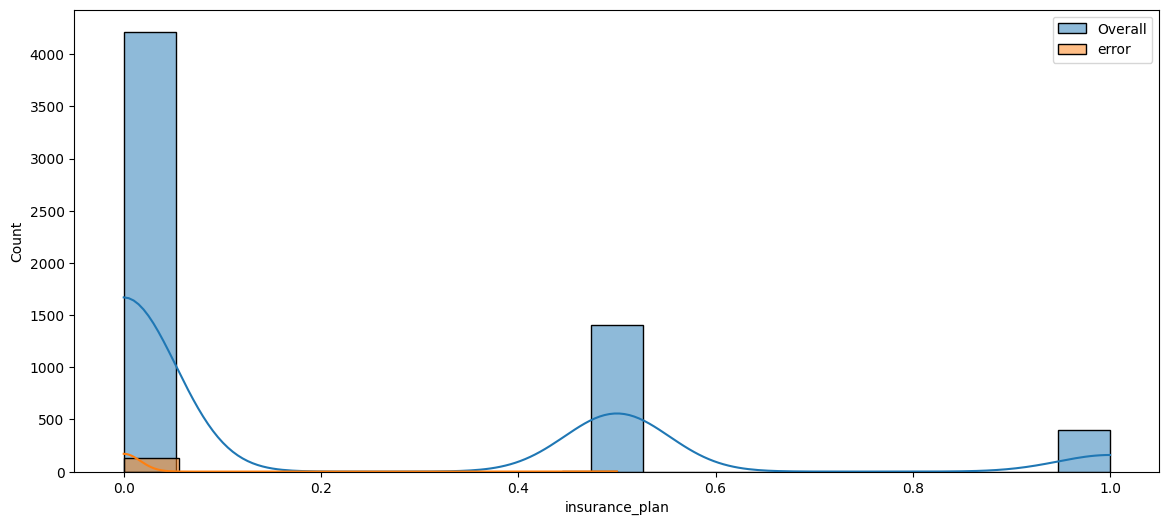

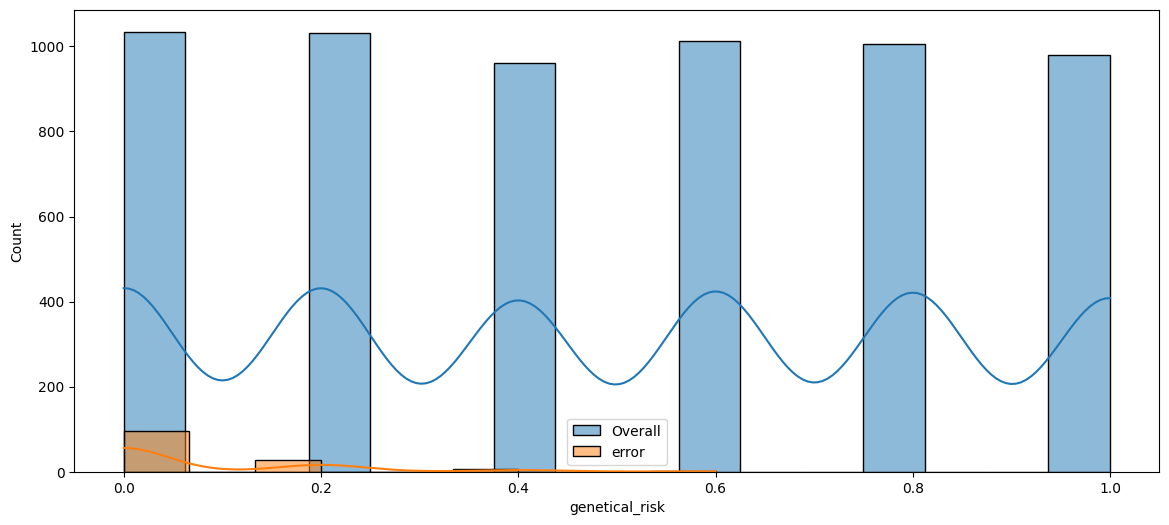

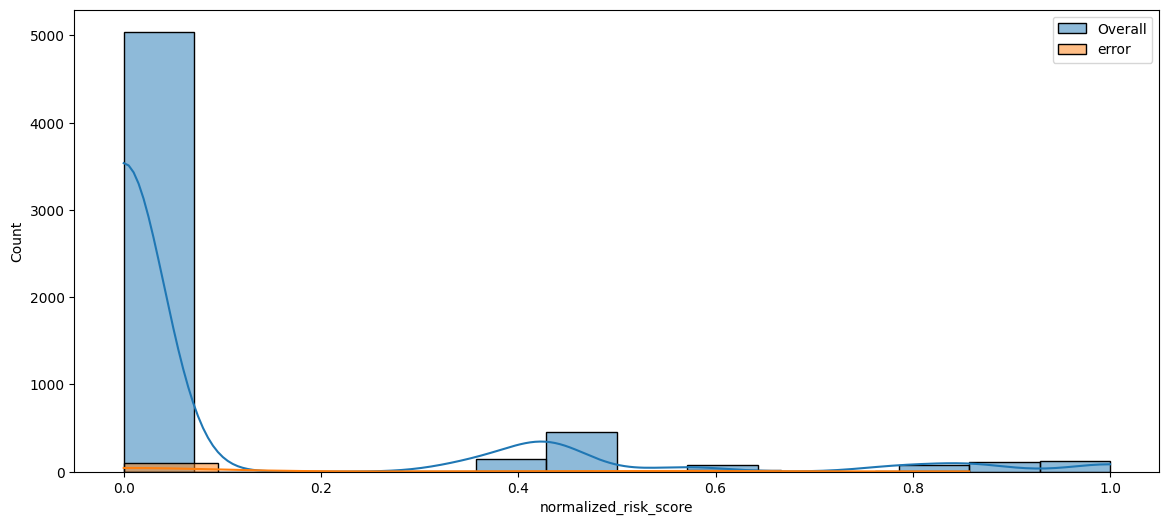

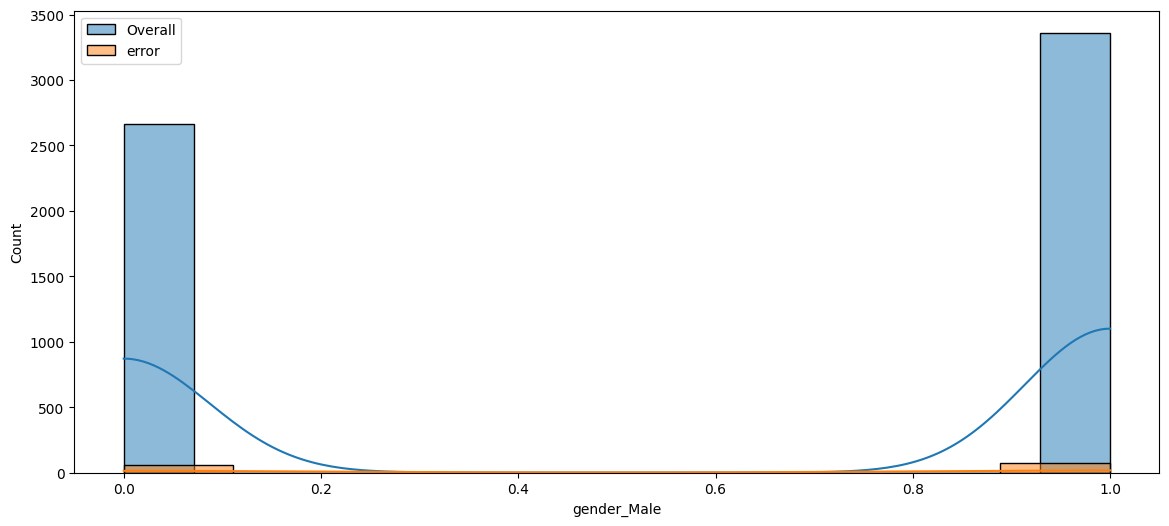

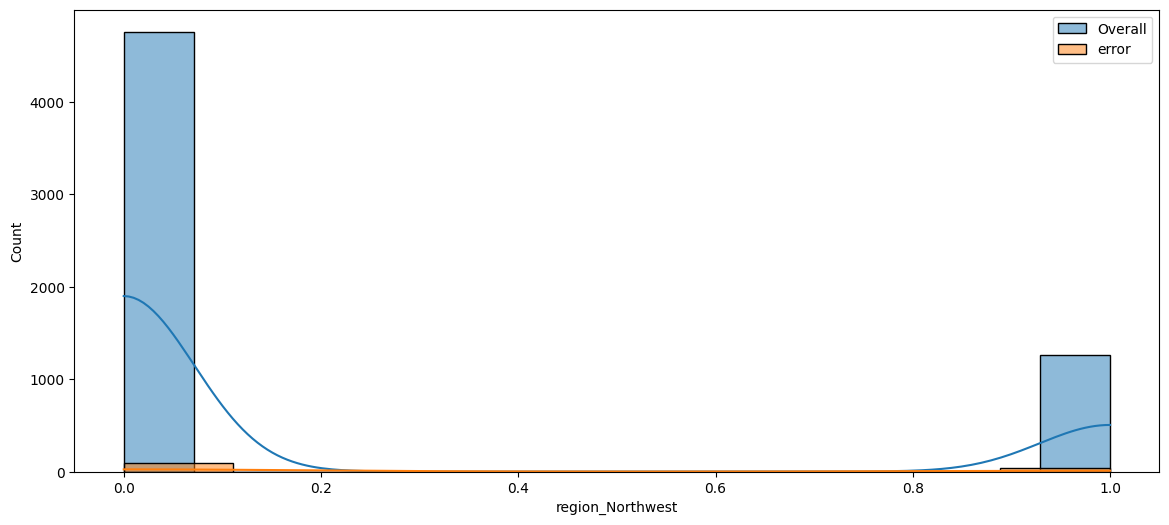

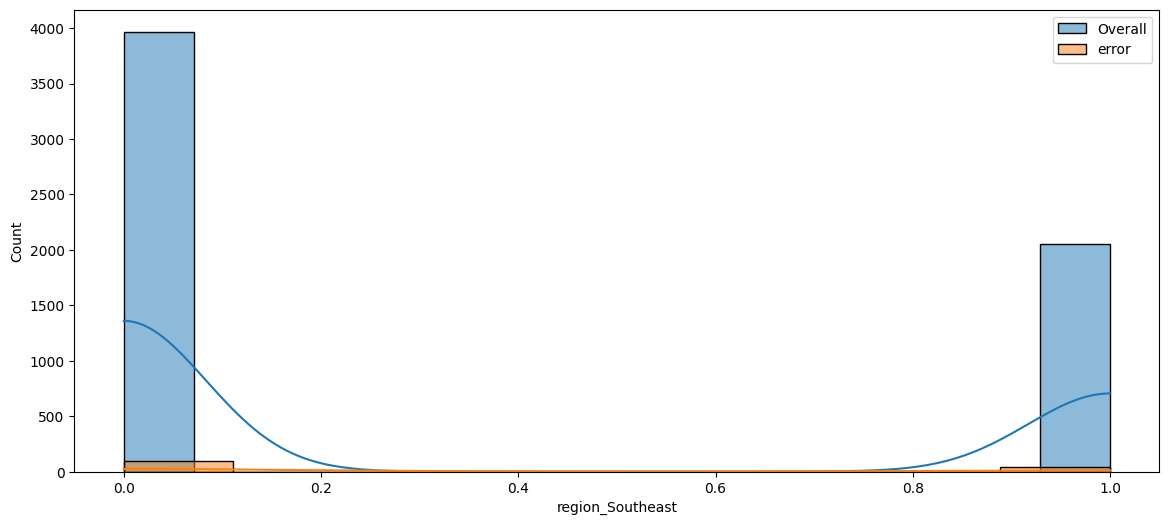

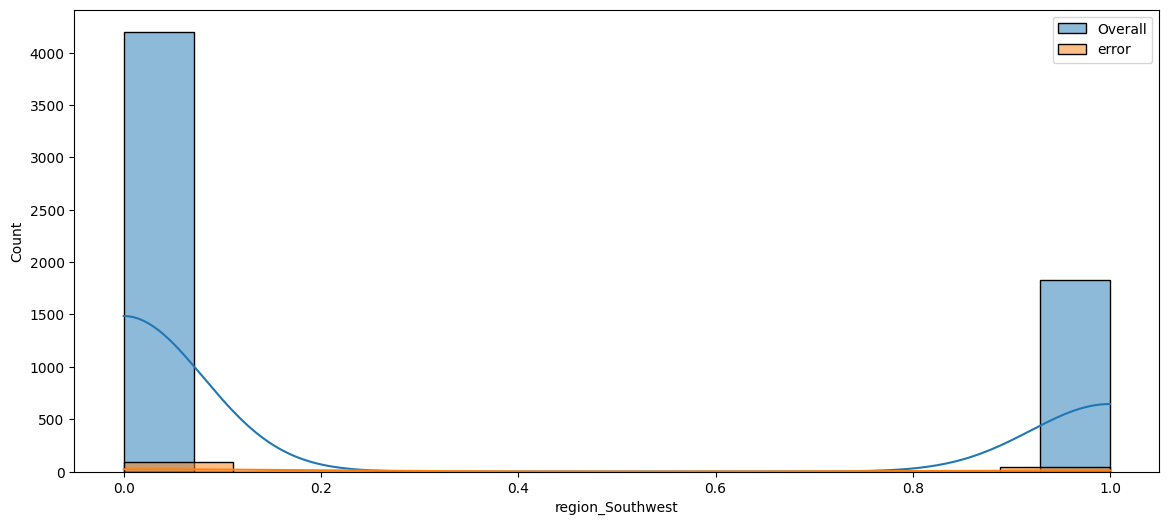

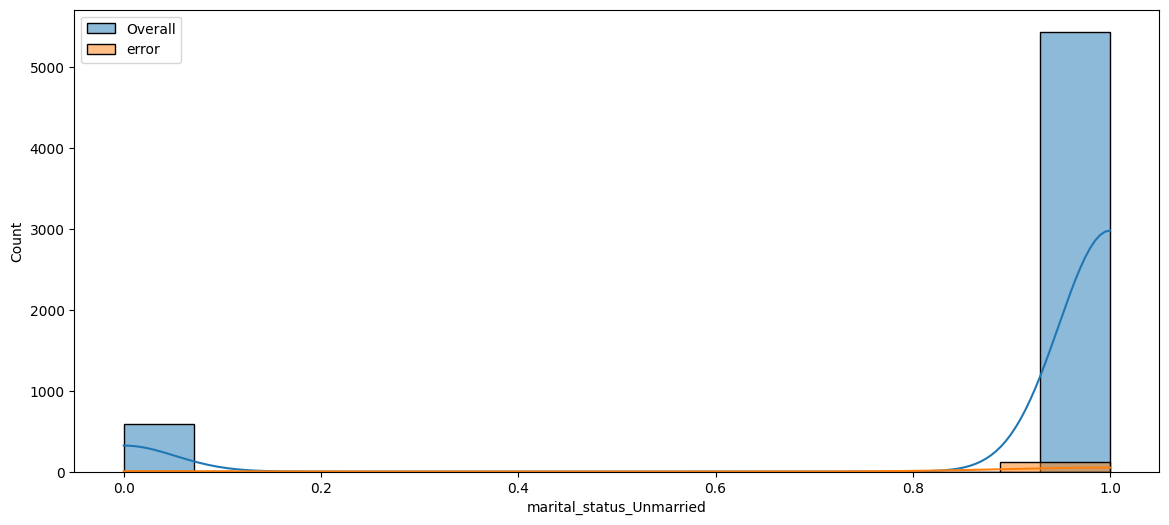

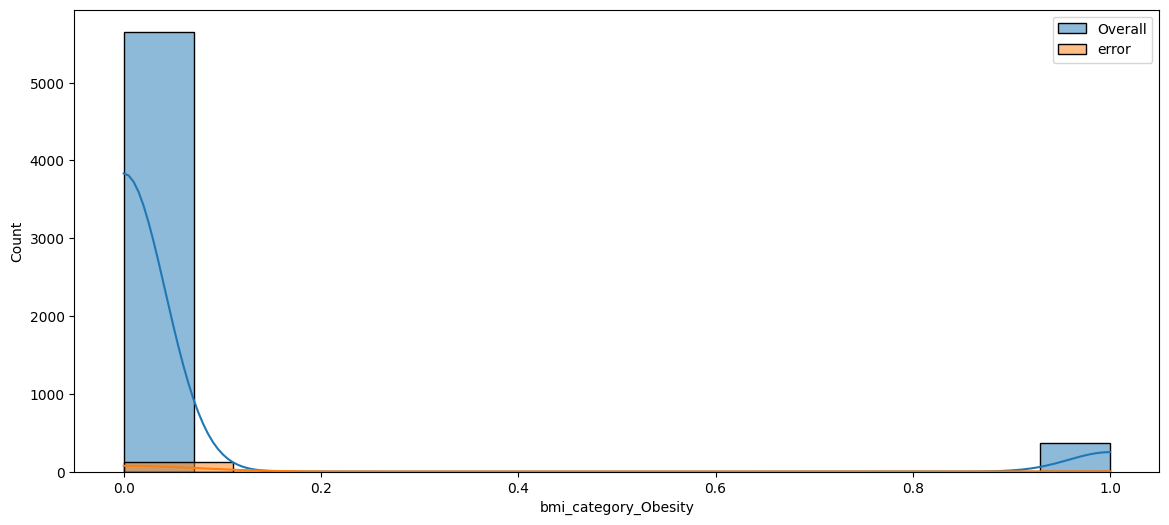

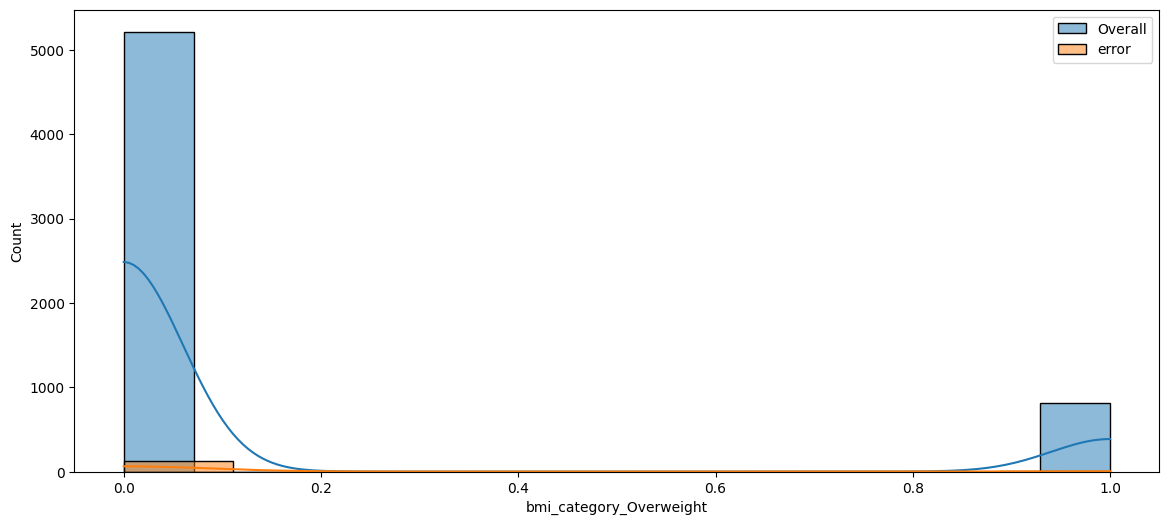

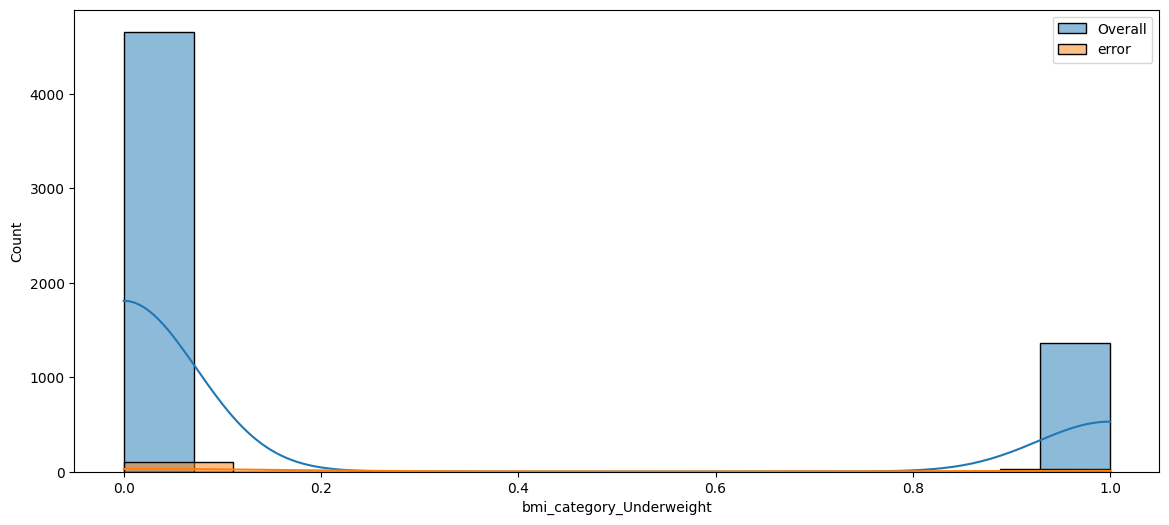

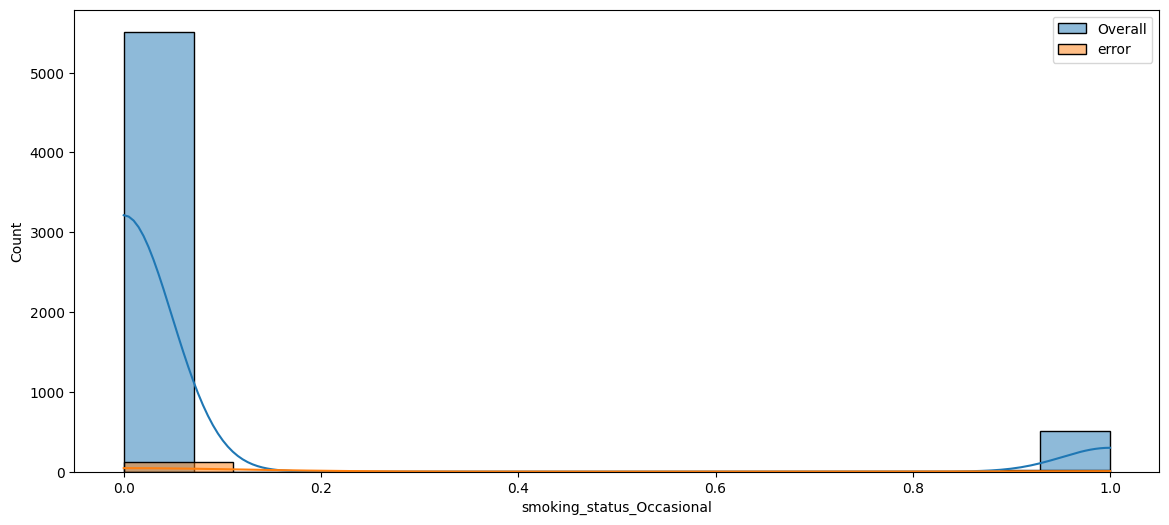

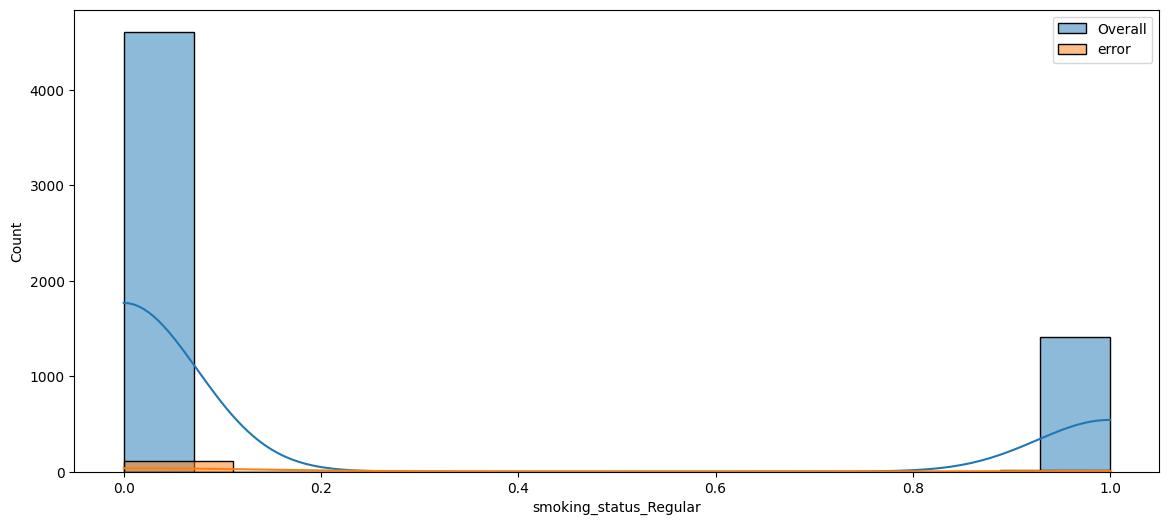

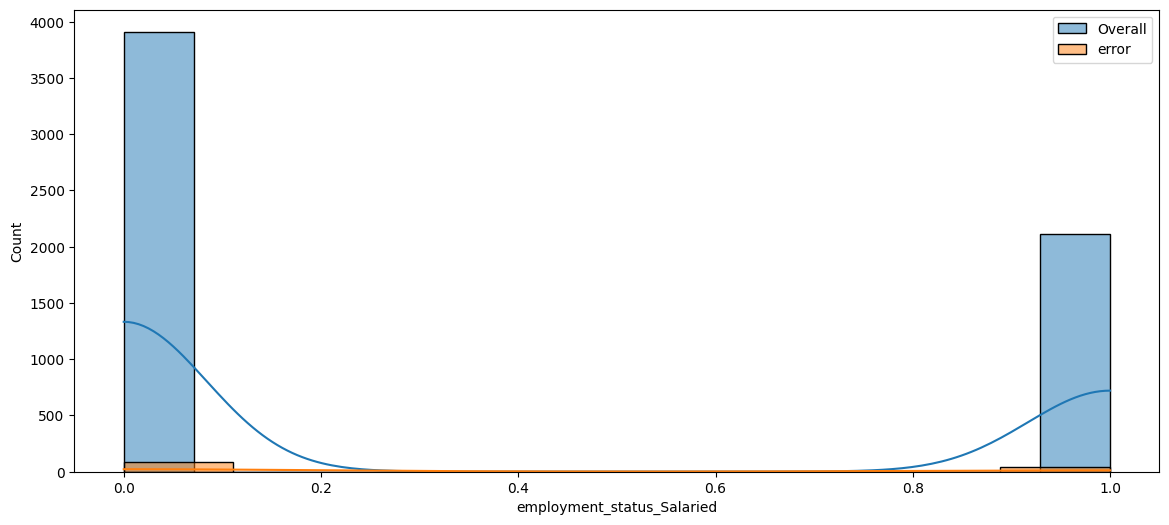

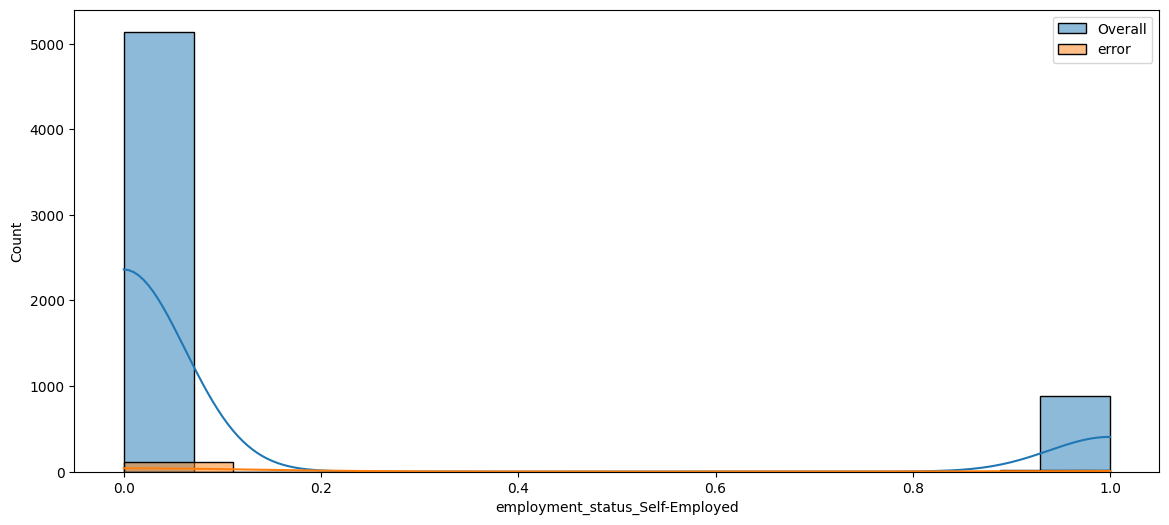

In [80]:
for col in X_test.columns:
    plt.figure(figsize=(14, 6))
    sns.histplot(X_test[col], kde=True, label='Overall')
    sns.histplot(error_df[col], kde=True, label='error')
    plt.legend()
    plt.show()

# Export Model

In [109]:
from joblib import dump

dump(best_model, 'model_young.joblib')


['model_young.joblib']

In [111]:
scaler_with_col = {
    'scaler': scaler,
    'columns': col_scale
}

scaler_with_col
dump(scaler_with_col, 'scaler_young.joblib')

['scaler_young.joblib']